# COURSERA IBM MACHINE LEARNING CERTIFICATION
## Léa Zurfluh - Apr 2021
### End of module project: Supervised Learning - Classification

Aim of project is to refine a classification algorithm using clustering on a chosen dataset and present insights to senior audience.

Data set chosen: Gender Pay Gap.
Same data set as the one I chose for the Linear Regression project, available [here](https://github.com/LeaZurfluh/ibm-machinelearning-certification/blob/master/2.%20Supervised%20Linear%20Regression%20-%20Gender%20Pay%20Gap.ipynb), and the Classification project, available [here](https://github.com/LeaZurfluh/ibm-machinelearning-certification/blob/master/3.%20Supervised%20Classification%20-%20Gender%20Pay%20Gap.ipynb). Initial Data Cleaning, Feature Engineering and Exploratory Data Analysis have been performed in that Linear Regression project and will not be repeated in this Jupyter notebook.


## 1. Brief description of the data set and a summary of its attributes

This Gender Pay Gap data set has been published by Glassdoor and is available [here](https://www.glassdoor.com/research/how-to-analyze-gender-pay-gap-employers-guide/#).
This data set exposes pay and bonus for some characteristics, including gender (see full list of characteristics below). This information comes from a salary survey done in 2019 in the U.S.

1000 rows.

|   |Column attribute |Type  |Comment |
| - | ------- | ------------ | ---- |
| 0	| JobTitle  | object |Ex: Software Engineer  |
| 1	| Gender  | object  |Binary: Male or Female  |
| 2	| Age  | int64  | From 18 to 65  |
| 3	| PerfEval  | int64  |How the employee performs out of 5  |
| 4	| Education  | object  |Highest diploma  |
| 5	| Dept  | object  |Department. Ex: Sales  |
| 6	| Seniority  | int64  |Level of seniority of employee out of 5  |
| 7	| BasePay  | int64  |Annual base salary in USD  |
| 8	| Bonus  | int64  |Annual bonus in USD  |

Let's try to predict Gender with all the other available features and by performing clustering.


## 2. Data exploration
### I. Data cleaning / Feature engineering / Exploratory Data Analysis
See [Linear Regression project](https://github.com/LeaZurfluh/ibm-machinelearning-certification/blob/master/2.%20Supervised%20Linear%20Regression%20-%20Gender%20Pay%20Gap.ipynb).

### II. Classification models to predict gender
##### II.a. K-Nearest Neighbours
##### II.b. Adding clustering: KMeans
##### II.c. Adding clustering: Hierarchical Agglomerative Clustering

### III. Conclusion

## <font color = 'blue'> 1. Get the data </font>

In [1]:
### IMPORTS ###
import pandas as pd
import numpy as np
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing & metrics
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, f1_score
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
# KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering

### VARIABLES ###
FILE = 'Glassdoor Gender Pay Gap.csv'

In [2]:
# Store data set in dataframe
df = pd.read_csv('data' + FILE)
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## <font color = 'blue'> 2. Data Exploration </font>
### <font color = 'blue'>II. Classification models to predict gender </font>
#### <font color = 'blue'>II.a. K-Nearest Neighbours </font>

The KNN algorithm is based on distance, hence we need to scale our features.

In [3]:
# Let's define the type of our variables first.
# DataFrame that has the name of the feature and the number of unique values:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
JobTitle,10
Gender,2
Age,48
PerfEval,5
Education,4
Dept,5
Seniority,5
BasePay,992
Bonus,941


In [4]:
# Let's divide all of our variables in binary / ordinal / categorical / numerical variables so that 
# it is easier to take care of each category separately.

# Binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)

# Ordinal variables
ordinal_variables = ['PerfEval', 'Seniority', 'Education', 'Age']

# Categorical variables
categorical_variables = list(set(list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)) - set(ordinal_variables))

# Numerical variables
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

print('The binary variables are: {}'.format(binary_variables))
print('The ordinal variables are: {}'.format(ordinal_variables))
print('The categorical variables are: {}'.format(categorical_variables))
print('The numeric variables are: {}'.format(numeric_variables))

The binary variables are: ['Gender']
The ordinal variables are: ['PerfEval', 'Seniority', 'Education', 'Age']
The categorical variables are: ['Dept', 'JobTitle']
The numeric variables are: ['Bonus', 'BasePay']


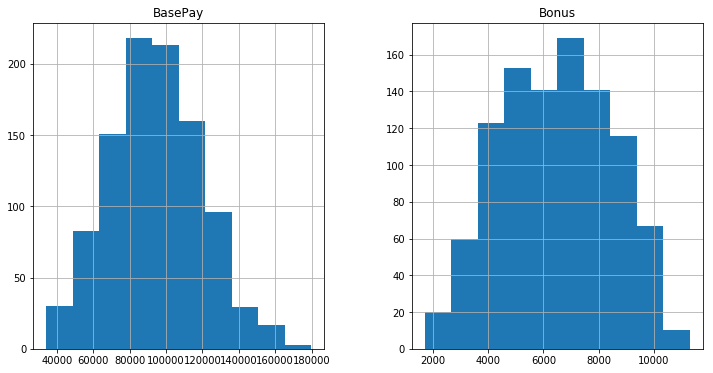

In [5]:
df[numeric_variables].hist(figsize=(12, 6));

In [6]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb, le = LabelBinarizer(), LabelEncoder()

In [7]:
round(df[ordinal_variables].describe(),1)

,PerfEval,Seniority,Age
count,1000.0,1000.0,1000.0
mean,3.0,3.0,41.4
std,1.4,1.4,14.3
min,1.0,1.0,18.0
25%,2.0,2.0,29.0
50%,3.0,3.0,41.0
75%,4.0,4.0,54.2
max,5.0,5.0,65.0


In [8]:
# Out of the 4 categorical variables, 3 are already encoded as integers. Only Education is not:
edu = {'High School':0, 'College':1, 'Masters':2, 'PhD':3}
df.Education = df.Education.map(edu)

In [9]:
# Transform Gender
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [10]:
lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [11]:
# Transform categorical variables
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [12]:
df.head()

,Gender,Age,PerfEval,Education,Seniority,BasePay,Bonus,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate
0,0,18,5,1,2,42363,9938,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,21,5,1,5,108476,11128,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,19,4,3,5,90208,9268,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,20,5,2,4,108080,10154,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,26,5,2,5,99464,9319,1,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
mm = MinMaxScaler()
for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])

round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Gender,1000.0,0.532,0.499,0.0,0.000,1.000,1.000,1.0
Age,1000.0,0.498,0.304,0.0,0.234,0.489,0.771,1.0
PerfEval,1000.0,0.509,0.356,0.0,0.250,0.500,0.750,1.0
Education,1000.0,0.489,0.374,0.0,0.000,0.333,0.667,1.0
Seniority,1000.0,0.493,0.349,0.0,0.250,0.500,0.750,1.0
BasePay,1000.0,0.414,0.174,0.0,0.293,0.406,0.532,1.0
Bonus,1000.0,0.497,0.209,0.0,0.328,0.501,0.659,1.0
Dept_Engineering,1000.0,0.192,0.394,0.0,0.000,0.000,0.000,1.0
Dept_Management,1000.0,0.198,0.399,0.0,0.000,0.000,0.000,1.0
Dept_Operations,1000.0,0.210,0.408,0.0,0.000,0.000,0.000,1.0


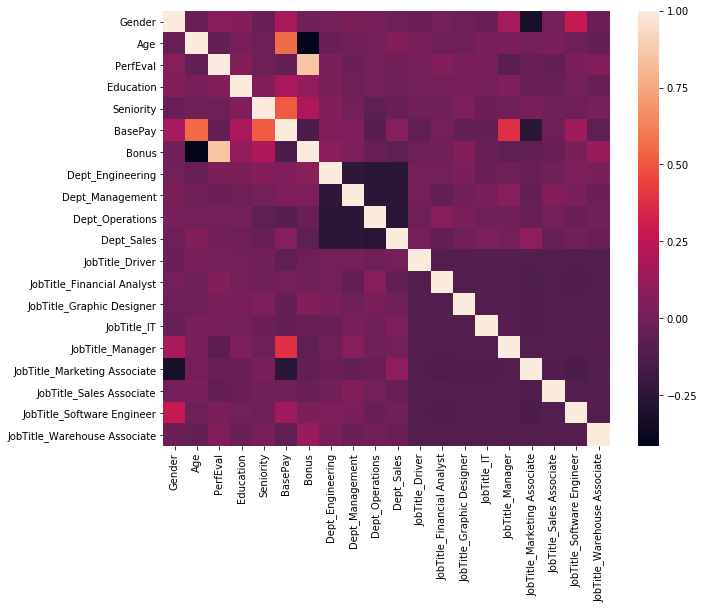

In [14]:
# Now that all variables are encoded and scaled, let's take a look at the correlation matrix
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df.corr());

Interestingly, Gender is quite negatively correlated with being a Marketing Associate. As 'Female' = 'False' we can conclude that there are more Female Marketing Associates.

Similarly, Gender is positively correlated with being a Software Engineer: there are more Male Software Engineers.

Now let's run a KNN model with hyperparameter tuning & Cross Validation in order to find the best K leading to the highest F1 score.

In [15]:
# Set up X and y variables
y, X = df['Gender'], df.drop(columns='Gender')

# Hyperparameter tuning - identify the best K with cross validation
kf = KFold(shuffle=True, random_state=7879, n_splits=3)
max_k = 650
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k+1, 50):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    y_pred_knn = cross_val_predict(knn, X, y, cv=kf)

    f1 = f1_score(y_pred_knn, y)
    f1_scores.append((k, round(f1_score(y, y_pred_knn), 4)))
    error = 1-round(accuracy_score(y, y_pred_knn), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

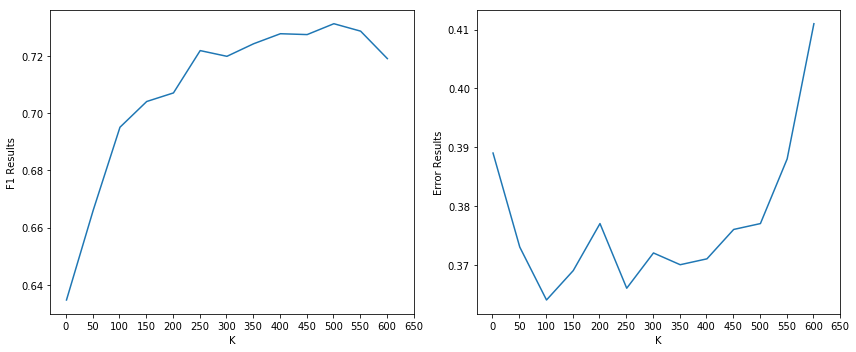

In [16]:
# Plotting F1 and Error Rate for each K
metrics = [f1_results, error_results]
metrics_names = ['F1 Results', 'Error Results']
fig, axes = plt.subplots(1, 2,figsize=(12,5))

for i, (ax, metric) in enumerate(zip(axes.flatten(), metrics)):
    ax.plot(metric.set_index('K'))
    ax.set(xlabel='K', ylabel=metrics_names[i])
    ax.set_xticks(range(0, max_k+1, 50))
    plt.tight_layout();

Visually, we can conclude taking K = 250 as best trade-off of high F1 score and low error seems to be satisfactory.


In [17]:
# Estimate KNN model and report outcomes
best_k = 250
knn = KNeighborsClassifier(n_neighbors=int(best_k))
y_pred_knn = cross_val_predict(knn, X, y, cv=kf)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y, y_pred_knn))
print('Accuracy score: ', round(accuracy_score(y, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y, y_pred_knn), 3))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47       468
           1       0.60      0.88      0.72       532

    accuracy                           0.63      1000
   macro avg       0.66      0.61      0.59      1000
weighted avg       0.66      0.63      0.60      1000

Accuracy score:  0.63
F1 Score:  0.716


#### <font color = 'blue'>II.b. Adding clustering: KMeans </font>

Lets run a KMeans algorithm with different numbers of clusters to understand if we can improve accuracy / F1 of our KNN algorithm by adding it to the existing features.

In [18]:
# Function to run 10 instances of prediction model (with 10 different train test splits) and average their F1 scores.
def get_f1_10splits(estimator, X, y):
    f1_list = []
    for i in range(9):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        f1_list.append(f1_score(y_test, y_predicted))
    return np.mean(f1_list)

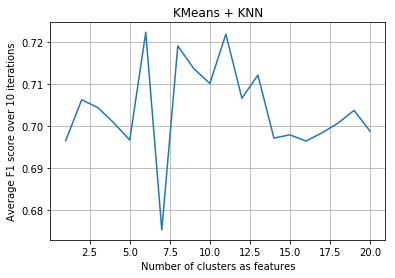

In [19]:
# Create KMeans to cluster together BasePay and Bonus, and see if it improves the F1 of the KNN with 250 neighbours
# we found above. 

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X)
    km_col = pd.Series(km.predict(X))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X, km_cols], axis=1)

estimator = KNeighborsClassifier(n_neighbors=250, weights='distance')
ns = range(1, 21)
f1_list = [get_f1_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, f1_list)
ax.set(
    #xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average F1 score over 10 iterations',
    title='KMeans + KNN'
)
ax.grid(True)

As a reminder: we found f1 = 0.716 for our KNN model with 250 neighbours.
The graph above shows that adding clustering with KMeans and keeping 250 neighbours does not drastically improve the F1 score.

#### <font color = 'blue'>II.c. Adding Clustering: Hierarchical Agglomerative Clustering </font>

Now, let's repeat this last step by adding Hierarchical Agglomerative Clustering. 

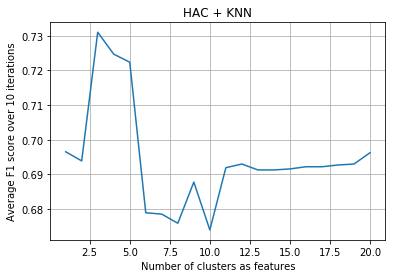

In [20]:

def create_hac_columns(n):
    hac = AgglomerativeClustering(n_clusters=n, linkage='ward', compute_full_tree=True)
    hac_col = pd.Series(hac.fit_predict(X))
    hac_cols = pd.get_dummies(hac_col, prefix='hac_cluster')
    return pd.concat([X, hac_cols], axis=1)

estimator = KNeighborsClassifier(n_neighbors=250, weights='distance')
ns = range(1, 21)
f1_list = [get_f1_10splits(estimator, create_hac_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, f1_list)
ax.set(
    #xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average F1 score over 10 iterations',
    title='HAC + KNN'
)
ax.grid(True)

In [21]:
# Finding number of clusters leading to highest F1:
pd.DataFrame(zip(ns, f1_list), columns=['nb clusters', 'f1']).head()

,nb clusters,f1
0,1,0.696506
1,2,0.693869
2,3,0.731013
3,4,0.724686
4,5,0.722369


The graph above shows having 3 clusters with HAC does improve F1 a bit (from 0.716 to 0.731).
This is thus the retained method for improving our supervised learning algorithm.

### <font color = 'blue'>III. Conclusion </font>
##### <font color = 'blue'> III.a. Summary </font>

The aim of this project was to understand whether we could improve our existing Supervised Classification model by introducing clustering as a means to do feature engineering. 
1. First, I took the KNN algorithm from my earlier project on Classification and introduced cross validation. I found the best number of neighbours was 250, which was retained for the following steps. Our F1 score was 0.716.
2. Then, I introduced the KMeans algorithm with varying number of clusters before re-running KNN in order to find out whether clustering would increase F1. There was only a tiny increase.
3. Finally, I did the same as in 2., but with Hierarchical Agglomerative Clustering. This led to a higher F1 increase, to 0.731 for 3 clusters.

<b> Given the increase in F1 seen by introducing HAC with 3 clusters, this is the retained method for improving supervised classification.</b>

Also as mentioned at the top of this paper, the data set was published cleaned and might not be representative of the population - those prediction models are thus to be taken with caution.


##### <font color = 'blue'> III.b. Next steps </font>

A natural next step would be to also try MeanShift or DBSCAN, which I left aside for this project due to parameter tuning that is a bit more complex (for MeanShift, we need to tune the bandwidth, which selection is not easy; whereas for DBSCAN there are 2 parameters to tune: epsilon and the minimum number of samples).

Moreover, I have used clustering as feature engineering, but another next step would be to check whether reducing dimensionality would lead to better results.

Of course, checking if we could achieve similar results on a raw dataset that has not been cleaned beforehand or only slightly could also be interesting.